## Fast Fourier Transform

In this project, the fast Fourier transform algorithm is implemented. The FFT algorithm computes the Fourier transform by recursively splitting the input discrete function into even and odd elements terms. This reduces the computation time from $N^2$ to $N log(N)$ compared to the discrete Fourier transform. 

The Fourier transform of a Gaussian function also has a Gaussian shape. Therefore, the FFT algorithm is tested on a Gaussian and the original data and the Fourier transform are plotted, and as can be seen from the plots below, the Fourier transform is indeed also a Gaussian.

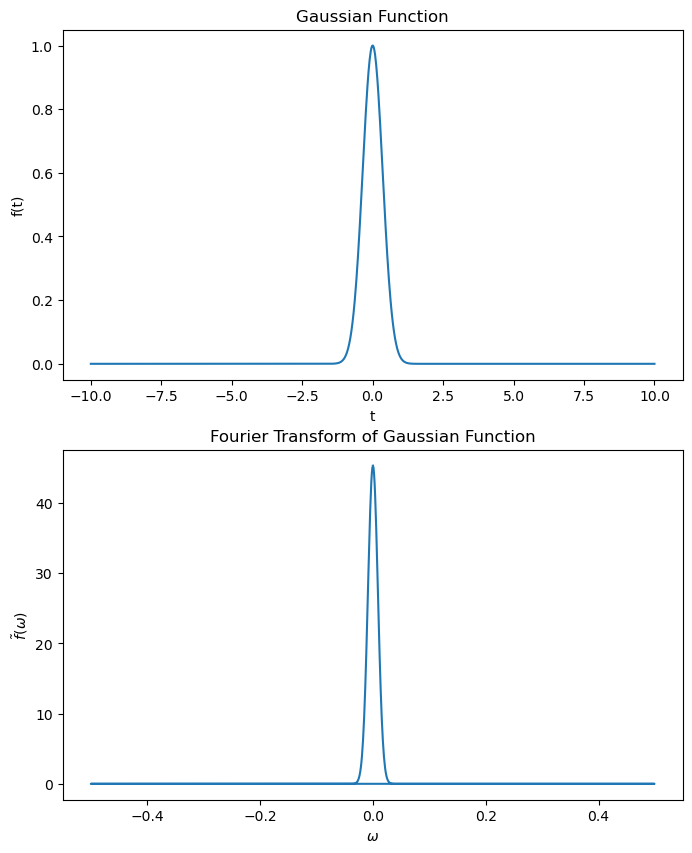

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# define the recursive FFT algorithm
def fft(f):
    n = len(f)
    if n == 1:
        return f
    else:
        even = fft(f[0::2])
        odd = fft(f[1::2])
        c1 = [even[k] + odd[k] * np.exp(-2j*np.pi*k/n) for k in range(n//2)]
        c2 = [even[k] - odd[k] * np.exp(-2j*np.pi*k/n) for k in range(n//2)]
        return c1 + c2
    
# create a Gaussian
x = np.linspace(-10, 10, num=1024)
f = np.exp(-x**2*4)

# compute the FFT
f_tilde = fft(y)

# compute the frequency axis
freq = np.fft.fftfreq(len(x))

# compute the magnitude of the FFT
mag = np.abs(f_tilde)

# Plot the original data and the FFT magnitude
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(x,f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Gaussian Function')
plt.subplot(212)
plt.plot(freq,mag)
plt.xlabel('$\omega$')
plt.ylabel('$\~f (\omega)$')
plt.title('Fourier Transform of Gaussian Function')
plt.show()